> 本文是参考Python for Data Analysis（2nd Edition）git 网站在[这里](http://nbviewer.jupyter.org/github/pydata/pydata-book/blob/2nd-edition/ch11.ipynb)一书中第11章时间序列分析整理而成，参考了自己在工作中的经验，提取了时间序列中使用最多的功能进行说明，写成笔记方便自己查阅
> >原文中第11章的结构如下：Chapter 11: Time Series（时间序列）
+ 11.1 Date and Time Data Types and Tools（日期和时间数据类型及其工具）
+ 11.2 Time Series Basics（时间序列基础）
+ 11.3 Date Ranges, Frequencies, and Shifting（日期范围，频度，和位移）
+ 11.4 Time Zone Handling（时区处理）
+ 11.5 Periods and Period Arithmetic（周期和周期运算）
+ 11.6 Resampling and Frequency Conversion（重采样和频度转换）
+ 11.7 Moving Window Functions（移动窗口函数）

# 时间序列的基本介绍及工具
## 什么是时间序列
时间序列指能在任何能在时间上观测到的数据。很多时间序列是有固定频率（fixed frequency）的，意思是数据点会遵照某种规律定期出现，比如每15秒，每5分钟，或每个月。时间序列也可能是不规律的（irregular），没有一个固定的时间规律。如何参照时间序列数据取决于我们要做什么样的应用，我们可能会遇到下面这些：

+ Timestamps（时间戳），具体的某一个时刻
+ Fixed periods（固定的时期），比如2007年的一月，或者2010年整整一年
+ Intervals of time（时间间隔），通常有一个开始和结束的时间戳。Periods（时期）可能被看做是Intervals（间隔）的一种特殊形式。
+ Experiment or elapsed time（实验或经过的时间）；每一个时间戳都是看做是一个特定的开始时间（例如，在放入烤箱后，曲奇饼的直径在每一秒的变化程度

**python有标准包用来表示时间和日期数据。datetime, time, calendar，这些模块经常被使用。datetime.datetime类型，或简单写为datetime，被广泛使用：**

## Converting Between String and Datetime（字符串与时间的转换）¶

In [9]:
import pandas as pd
from datetime import datetime
import time

### **datetime.strptime**可以把字符串转换为日期

In [15]:
stamp = '2018-07-10'
stamp = datetime.strptime(stamp, '%Y-%m-%d')
stamp 

datetime.datetime(2018, 7, 10, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

### **datetime.strftime**可以把日期转换为字符串

In [16]:
stamp.strftime('%Y-%m-%d')

'2018-07-10'

## 直接使用.year提取时间类型数据中的年份信息

In [17]:
stamp.year

2018

In [18]:
stamp.month

7

In [19]:
stamp.month

10

## parse：智能处理非格式化时间的利器
对于一个一直的时间格式，使用datetime.strptime来解析日期是很好的方法。但是，如果每次都要写格式的话很烦人，尤其是对于一些比较常见的格式。在这种情况下，我们可以使用第三方库dateutil中的parser.parse方法（这个库会在安装pandas的时候自动安装）：

In [21]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
parse('6/12/2011', dayfirst=True)
#在国际上，日在月之前是很常见的（译者：美国是把月放在日前面的），所以我们可以设置dayfirst=True来指明最前面的是否是日：

datetime.datetime(2011, 12, 6, 0, 0)

## to_datetime：在pandas中智能处理非格式化时间的利器

In [23]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [24]:
#Nat(Not a Time)在pandas中，用于表示时间戳为空值（null value）
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

# Pandas中的一些时间序列
## Indexing, Selection, Subsetting（索引，选择，取子集）

In [25]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.537572
2000-01-02    0.200562
2000-01-03    1.666410
2000-01-04   -0.919596
2000-01-05    1.056851
2000-01-06    0.497354
2000-01-07    0.480527
2000-01-08   -1.009802
2000-01-09   -0.840635
2000-01-10    0.059392
2000-01-11    0.098471
2000-01-12   -0.799680
2000-01-13    0.995552
2000-01-14   -0.470744
2000-01-15   -0.367504
2000-01-16    0.463307
2000-01-17   -1.376227
2000-01-18    0.576925
2000-01-19   -0.408554
2000-01-20    0.737751
2000-01-21    0.426218
2000-01-22   -0.608203
2000-01-23   -0.730196
2000-01-24    0.754446
2000-01-25   -2.460010
2000-01-26    0.294779
2000-01-27    0.422068
2000-01-28    3.618689
2000-01-29    0.619873
2000-01-30    0.130171
                ...   
2002-08-28   -0.360471
2002-08-29    1.325669
2002-08-30   -0.515083
2002-08-31    0.032967
2002-09-01   -0.991343
2002-09-02   -0.960005
2002-09-03    0.135729
2002-09-04   -0.385378
2002-09-05    1.170881
2002-09-06    0.486576
2002-09-07   -0.613519
2002-09-08   -0.041438
2002-09-09 

In [26]:
#对于比较长的时间序列，我们可以直接传入一年或一年一个月，来进行数据选取：
longer_ts['2001']

2001-01-01    0.903731
2001-01-02   -0.044659
2001-01-03   -1.004242
2001-01-04   -1.255849
2001-01-05    0.404211
2001-01-06   -1.361959
2001-01-07    0.027354
2001-01-08    1.274417
2001-01-09   -0.754241
2001-01-10    0.684913
2001-01-11   -0.011341
2001-01-12   -1.549378
2001-01-13   -0.279339
2001-01-14    1.411899
2001-01-15   -1.264520
2001-01-16   -0.790397
2001-01-17   -0.402632
2001-01-18    1.330718
2001-01-19    2.145236
2001-01-20   -1.248496
2001-01-21    0.898494
2001-01-22    0.252422
2001-01-23   -0.491117
2001-01-24    2.685712
2001-01-25    0.536740
2001-01-26    0.406246
2001-01-27   -0.023607
2001-01-28    0.760966
2001-01-29   -0.739889
2001-01-30   -0.521250
                ...   
2001-12-02    1.152612
2001-12-03    1.172427
2001-12-04   -0.667765
2001-12-05   -0.922790
2001-12-06    1.295642
2001-12-07   -0.775355
2001-12-08   -0.114823
2001-12-09    0.715958
2001-12-10   -0.014285
2001-12-11   -2.775204
2001-12-12   -0.606184
2001-12-13   -0.732248
2001-12-14 

In [27]:
longer_ts['2001-05']

2001-05-01    2.350883
2001-05-02    0.458129
2001-05-03    0.772297
2001-05-04    1.204171
2001-05-05   -1.170310
2001-05-06   -1.953592
2001-05-07   -0.301950
2001-05-08   -1.287651
2001-05-09   -0.250588
2001-05-10    0.973407
2001-05-11    0.732150
2001-05-12   -0.994284
2001-05-13   -2.753977
2001-05-14   -0.747053
2001-05-15   -0.132615
2001-05-16    0.804284
2001-05-17   -0.063385
2001-05-18    0.359763
2001-05-19   -1.590298
2001-05-20   -0.102629
2001-05-21    0.660446
2001-05-22   -0.285870
2001-05-23    0.807832
2001-05-24   -1.240019
2001-05-25    1.026118
2001-05-26   -2.172475
2001-05-27   -0.145726
2001-05-28   -0.570153
2001-05-29    0.709278
2001-05-30    2.363984
2001-05-31   -0.242811
Freq: D, dtype: float64

In [32]:
#利用datetime进行切片（slicing）也没问题：
longer_ts['2001-01-07']

0.02735401453450005

In [33]:
longer_ts[datetime(2001, 1, 7)]

0.02735401453450005

## Resample （重采样）

In [39]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.790734
2000-01-02   -0.051310
2000-01-03    1.583309
2000-01-04   -1.182325
2000-01-05    0.322240
2000-01-06   -3.265333
2000-01-07   -1.361927
2000-01-08   -0.020065
2000-01-09   -1.157383
2000-01-10   -0.484393
2000-01-11   -1.161909
2000-01-12    0.392887
2000-01-13   -0.950305
2000-01-14    0.015800
2000-01-15   -2.203299
2000-01-16   -0.787219
2000-01-17   -0.310541
2000-01-18    0.849986
2000-01-19    1.711045
2000-01-20    1.472151
2000-01-21   -0.135271
2000-01-22    0.411213
2000-01-23   -0.093777
2000-01-24   -0.141748
2000-01-25   -1.163132
2000-01-26   -1.030460
2000-01-27    1.504614
2000-01-28   -0.284792
2000-01-29    0.204902
2000-01-30   -0.951577
                ...   
2000-03-11   -0.212891
2000-03-12    0.932171
2000-03-13    1.149123
2000-03-14    0.810214
2000-03-15   -0.848764
2000-03-16   -1.449526
2000-03-17    1.166174
2000-03-18   -1.362292
2000-03-19    0.219392
2000-03-20    0.639407
2000-03-21   -0.122230
2000-03-22    2.267807
2000-03-23 

In [41]:
ts.resample('M').mean()

2000-01-31   -0.325806
2000-02-29   -0.157135
2000-03-31    0.166116
2000-04-30    0.255708
Freq: M, dtype: float64

In [42]:
ts.resample('M', kind='period').mean()

2000-01   -0.325806
2000-02   -0.157135
2000-03    0.166116
2000-04    0.255708
Freq: M, dtype: float64

## pd.date_range:Generating Date Ranges （生成时间区间）

In [43]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [44]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

## Shifting :(Leading and Lagging) Data （偏移（提前与推后）数据）

In [45]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.653258
2000-02-29   -0.408284
2000-03-31    1.172957
2000-04-30    1.074689
Freq: M, dtype: float64

In [46]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.653258
2000-04-30   -0.408284
Freq: M, dtype: float64

In [47]:
ts.shift(-2)

2000-01-31    1.172957
2000-02-29    1.074689
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [48]:
#计算增长率
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.246957
2000-03-31   -3.872895
2000-04-30   -0.083778
Freq: M, dtype: float64

**因为普通的shift不会对index进行修改，一些数据会被丢弃。因此如果频度是已知的，可以把频度传递给shift，这样的话时间戳会自动变化**

In [49]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.653258
2000-04-30   -0.408284
Freq: M, dtype: float64

In [50]:
ts.shift(2,freq='M')

2000-03-31    1.653258
2000-04-30   -0.408284
2000-05-31    1.172957
2000-06-30    1.074689
Freq: M, dtype: float64

## offsets:Shifting dates with offsets（用偏移量来移动日期）
pandas的日期偏移（date offset）能被用于datetime或Timestamp对象：

In [52]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [53]:
#如果我们添加一个像MonthEnd这样的anchored offset(依附偏移；锚点位置)，日期会根据频度规则进行递增：
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [54]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [55]:
#依附偏移可以让日期向前或向后滚动，利用rollforward和rollback方法：
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [56]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

## rolling :Moving Window Functions

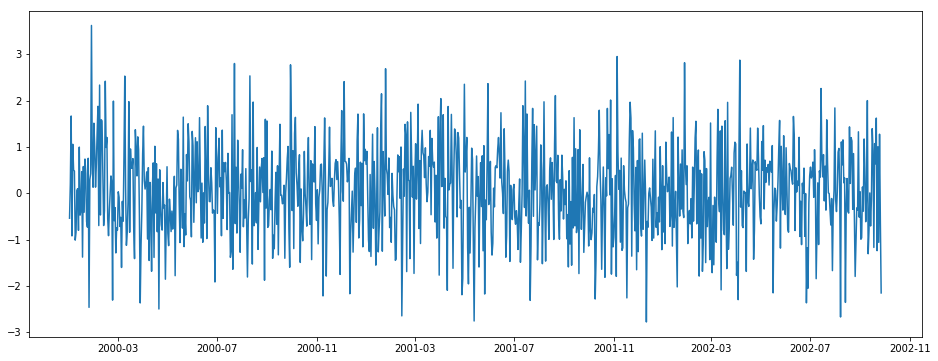

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16,6))
plt.plot(longer_ts.index,longer_ts)
plt.show()

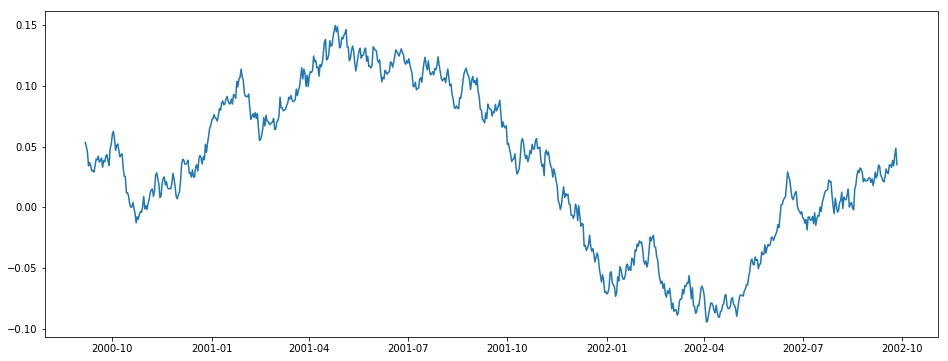

In [67]:
#250天的移动加权如下图
fig = plt.figure(figsize=(16,6))
plt.plot(longer_ts.index,longer_ts.rolling(250).mean())
plt.show()

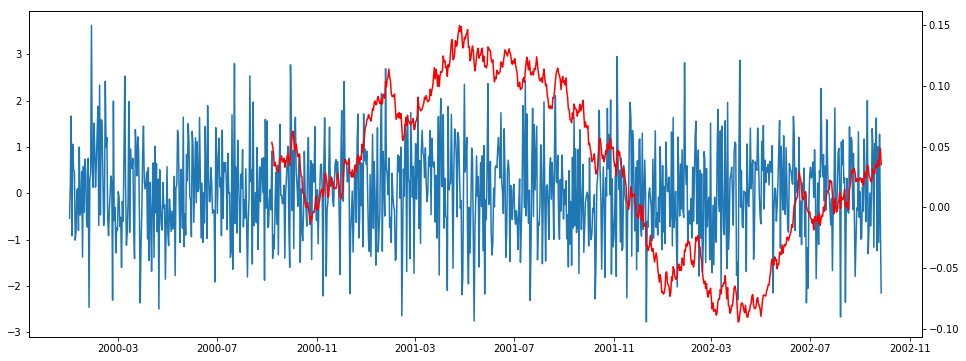

In [70]:
#放在一张图中
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
ax1.plot(longer_ts.index,longer_ts)
ax2 = ax1.twinx()
ax2.plot(longer_ts.index,longer_ts.rolling(250).mean(),color ='red')
plt.show()

## 自定义移动平均函数：User-De ned Moving Window Functions
可以使用apply函数去使得图形按照某个function去调整，以scipy里的percentileofscore函数为例:

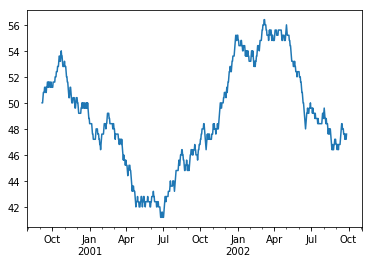

In [72]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = longer_ts.rolling(250).apply(score_at_2percent,raw='True')
result.plot()